#Actividad 3: Sergio Buitrago
##Materia: Diplomado de Analisis de datos con Python
1. Importando libreria pandas, cargando fuentes de datos y haciendo analisis descriptivo
Fuente de información: https://raw.githubusercontent.com/shecho30/Diplomado_python/main/Data/Video_Game.csv

Resumen DataSet Sales Video Game: Este dataset hace referencia a la venta y calificacion de los video juegos 

#Librerias

In [65]:
import pandas as pd
import missingno as msno 
from numpy import nan as np
import matplotlib.pyplot as plt
from pandas.core.groupby import groupby
import datetime
import plotly.graph_objs as gro
from collections import Counter as co
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches

#Fuente de información

In [2]:
url = 'https://raw.githubusercontent.com/shecho30/Diplomado_python/main/Data/Video_Game.csv'

In [3]:
df = pd.read_csv(url, sep=',')

#Análisis Descriptivo

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [ ]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

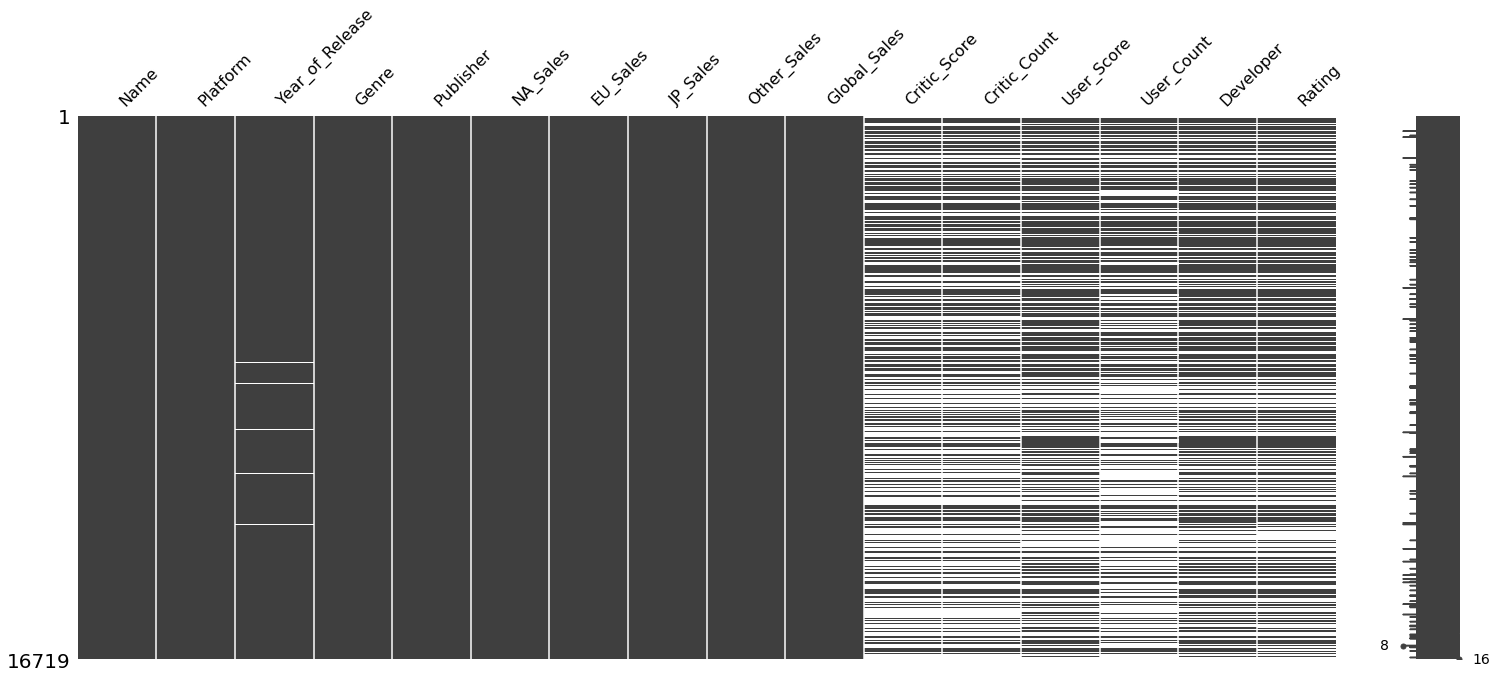

In [ ]:
msno.matrix(df)

In [ ]:
df.shape

(16719, 16)

In [ ]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

#Limpieza de Datos


In [21]:
df = df[df["Year_of_Release"].notnull()]
df = df[df["Genre"].notnull()]
df = df[df["Publisher"].notnull()]
df['Year_of_Release']=df['Year_of_Release'].astype('int64')
df['User_Score']=df['User_Score'].replace('tbd',0).astype('float64')

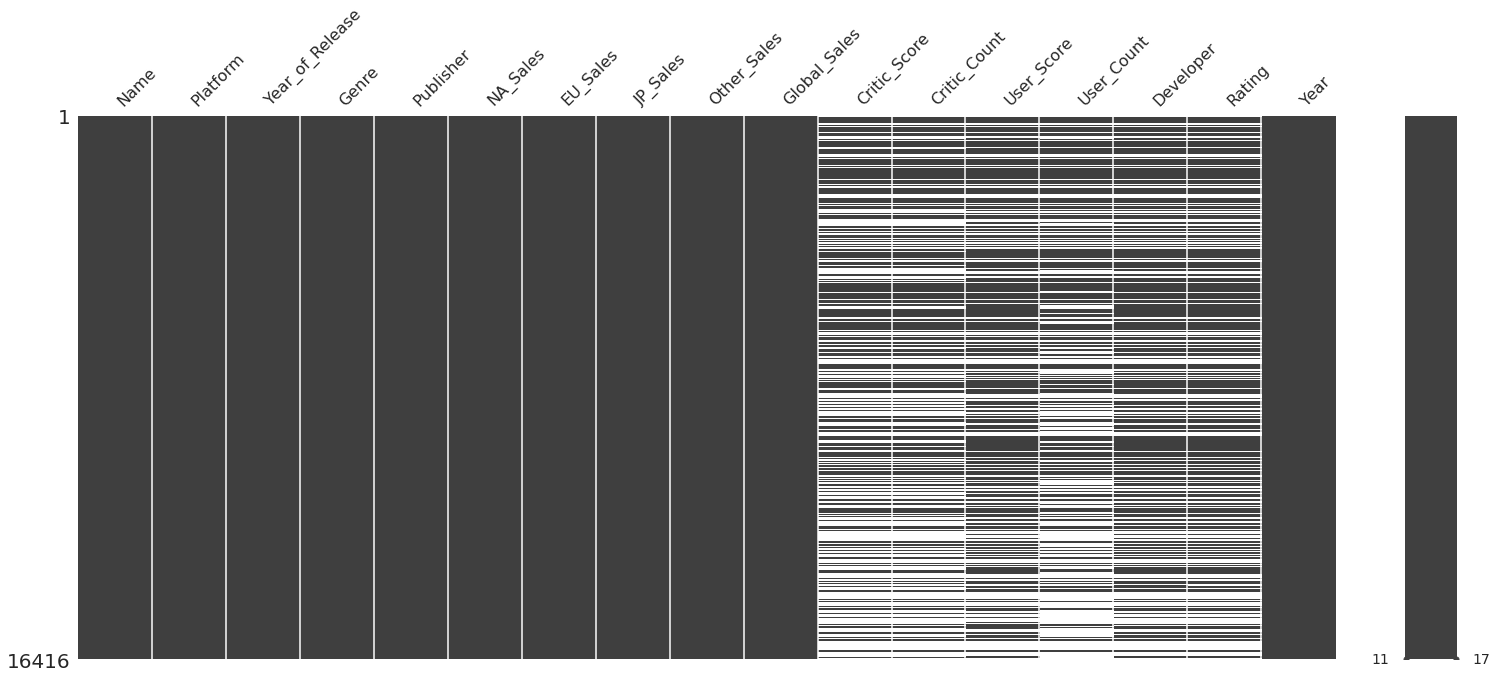

In [22]:
msno.matrix(df)

In [ ]:
df['Platform'].value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [ ]:
df['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year_of_Release, dtype: int64

In [ ]:
df[df['Year_of_Release'] == 2020]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E


In [ ]:
df.Platform[df['Year_of_Release'] == 2008].value_counts()

DS      492
Wii     282
PS2     191
X360    146
PS3     138
PSP     100
PC       76
XB        1
DC        1
Name: Platform, dtype: int64

In [ ]:
df['Genre'].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [ ]:
pd.unique(df['Developer'])

array(['Nintendo', nan, 'Good Science Studio', ..., 'Big Red Software',
       'Atomic Games', 'Interchannel-Holon'], dtype=object)

In [ ]:
df['Global_Sales'].describe()

count    16719.000000
mean         0.533543
std          1.547935
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.530000
Name: Global_Sales, dtype: float64

#Graficos

In [ ]:
genre = df.groupby('Genre')['Genre'].count()
genre

Genre
Action          3370
Adventure       1303
Fighting         849
Misc            1750
Platform         888
Puzzle           580
Racing          1249
Role-Playing    1500
Shooter         1323
Simulation       874
Sports          2348
Strategy         683
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Videojuegos por genero')

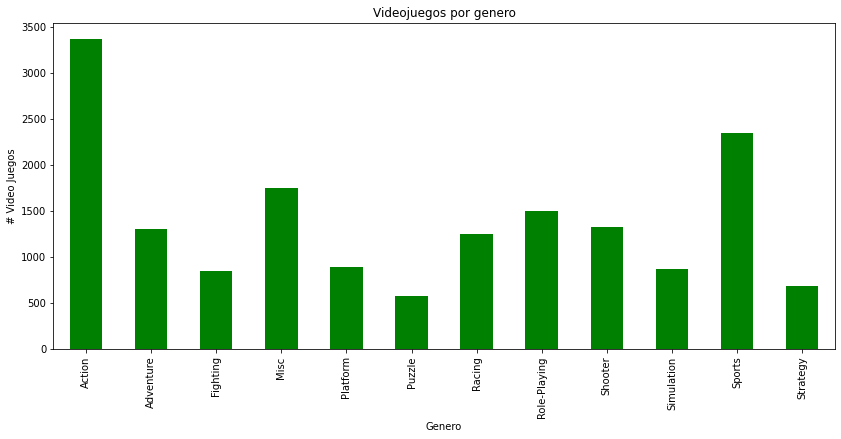

In [ ]:
plt.figure(figsize=(14,6))
genre.plot(kind='bar', color='Green')
plt.xlabel('Genero')
plt.ylabel('# Video Juegos')
plt.title('Videojuegos por genero')

In [14]:
df['Year'] = df.Year_of_Release.astype(int,errors='ignore')

In [116]:
Sales = df.groupby('Year')['Global_Sales'].sum()
Sales.head(20)

Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.17
1993.0     45.98
1994.0     79.18
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.45
1999.0    251.25
2000.0    201.58
2001.0    331.47
2002.0    395.51
2003.0    357.80
2004.0    413.75
2005.0    456.88
2006.0    518.22
2007.0    604.16
2008.0    671.79
2009.0    658.88
2010.0    590.43
Name: Global_Sales, dtype: float64

In [123]:
Years_ = [1980, 1985, 1990, 1995, 2000, 2005, 2010]
Sales_Years_ = df.query('Year in @Years_')
Sales_Years_.head(5)

Sales_2 = Sales_Years_.groupby('Year')['Global_Sales'].sum()
Sales_2.head(20)

Year
1980.0     11.38
1985.0     53.94
1990.0     49.39
1995.0     88.11
2000.0    201.58
2005.0    456.88
2010.0    590.43
Name: Global_Sales, dtype: float64

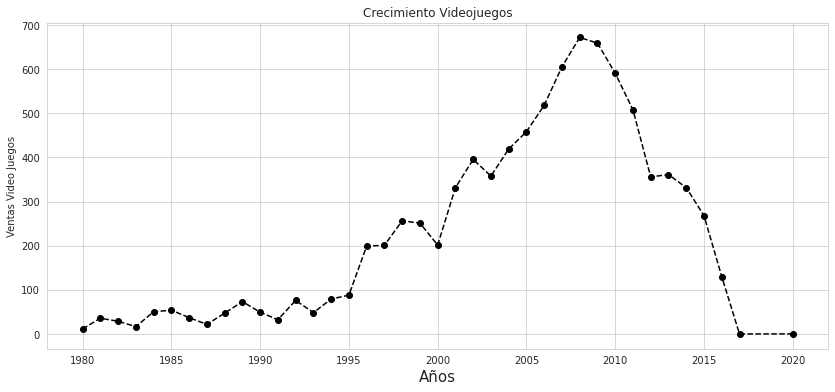

In [16]:
plt.figure(figsize=(14,6))
Sales.plot(style='--',color = 'black', marker = 'o')
plt.ylabel('Ventas Video Juegos')
plt.title('Crecimiento Videojuegos')
plt.xlabel("Años",fontsize=15);

#Dev

In [ ]:
co(df["Name"].tolist()).most_common(8)

[('Need for Speed: Most Wanted', 12),
 ('FIFA 14', 9),
 ('Madden NFL 07', 9),
 ('LEGO Marvel Super Heroes', 9),
 ('Ratatouille', 9),
 ('FIFA Soccer 13', 8),
 ('FIFA 15', 8),
 ('LEGO Star Wars II: The Original Trilogy', 8)]

In [ ]:
co(df["Platform"].tolist()).most_common(8)

[('PS2', 2161),
 ('DS', 2152),
 ('PS3', 1331),
 ('Wii', 1320),
 ('X360', 1262),
 ('PSP', 1209),
 ('PS', 1197),
 ('PC', 974)]

In [4]:
game = co(df['Name'].tolist()).most_common(10)
x = [x[0] for x in game]
y = [x[1] for x in game]

fig = gro.Bar(x = x,
             y = y,
             marker = dict(color = 'Purple'))

layout = gro.Layout()

fig = gro.Figure(data = fig, layout = layout)

fig.update_layout(title_text='Juegos mas repetidos')

fig.show()

In [23]:
game = co(df["Platform"].tolist()).most_common(8)
x = [x[0] for x in game]
y = [x[1] for x in game]

fig = gro.Bar(x = x,
             y = y,
             marker = dict(color = 'blue'))

layout = gro.Layout()

fig = gro.Figure(data = fig, layout = layout)

fig.update_layout(title_text='Plataformas con mas juegos')

fig.show()

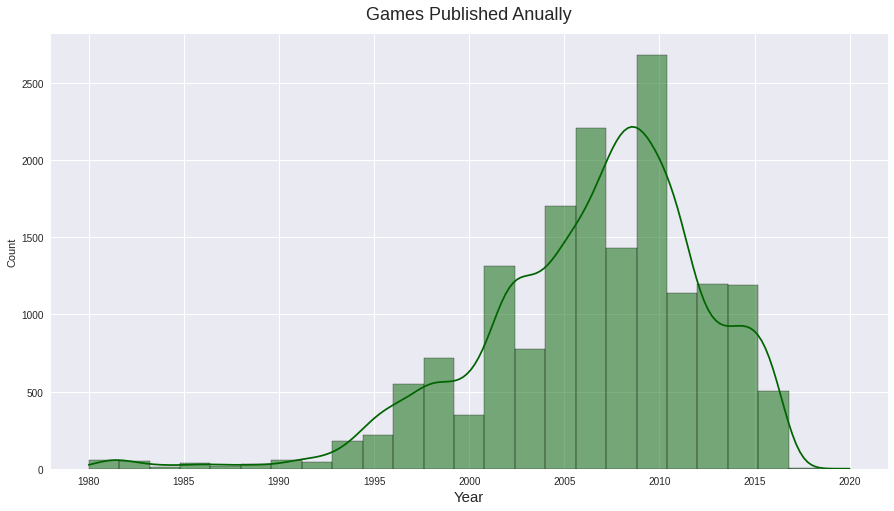

In [ ]:
plt.style.use("seaborn")

fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(df["Year_of_Release"], color="darkgreen", kde=True, bins=25)
plt.title("Games Published Anually", fontsize=18, y=1.02)
ax.set_xlabel("Year",fontsize=15);

In [37]:
sc = StandardScaler()
Year_Sales = df.groupby(df['Year']).apply(lambda x: pd.Series({
    'Count'       : x['Name'].count(),
    'Global_Sales'       : x['Global_Sales'].sum()})).reset_index()

Year_Sales_2 = pd.concat([Year_Sales['Year'],pd.DataFrame(sc.fit_transform(Year_Sales[['Count','Global_Sales']]),columns=['Count', 'Global_Sales'])],axis=1)

fig = gro.Figure(data=[
    gro.Scatter(
                x=Year_Sales_2['Year'], 
                y=Year_Sales_2['Count'],
                mode='lines+markers',
                name='Juegos Lanzados en el año',
                marker = dict(size=8),
                line=dict(color = 'blue',width=2.5),
                text=Year_Sales['Count'],
                
                hovertemplate = '<i>Año: </i>: %{x}'
                                '<br><i>Numero de juegos</i>: %{text}<br>'),
    gro.Scatter(
                x=Year_Sales_2['Year'], 
                y=Year_Sales_2['Global_Sales'],
                mode='lines+markers',
                name='Ventas',
                marker = dict(size=8),
                line=dict(color = '#6495ED',width=2.5),
                text = Year_Sales['Global_Sales'],
                hovertemplate = '<i>Año: </i>: %{x}'
                                '<br><i>Numero de juegos</i>: %{text}<br>')

],layout=dict(legend=dict(x=0.73, y=1.15, font=dict(size=10)),legend_orientation="v",title="Releación entre las ventas y los lanzamientos de juegos",
            xaxis=dict(tickmode = 'linear',tickangle=-90,tickfont=dict(size=10),title="Año de lanzamiento",tickwidth=5,ticklen=8,zeroline=True,gridcolor="white",
             showline=True),
            yaxis=dict(title="Lanzamientos / Ventas totales",zeroline=True,showline=True,gridcolor="#DCDCDC",
                         showgrid=True,
        zerolinecolor='#DCDCDC',
        zerolinewidth=1)
            ,plot_bgcolor='white'))

fig.show()

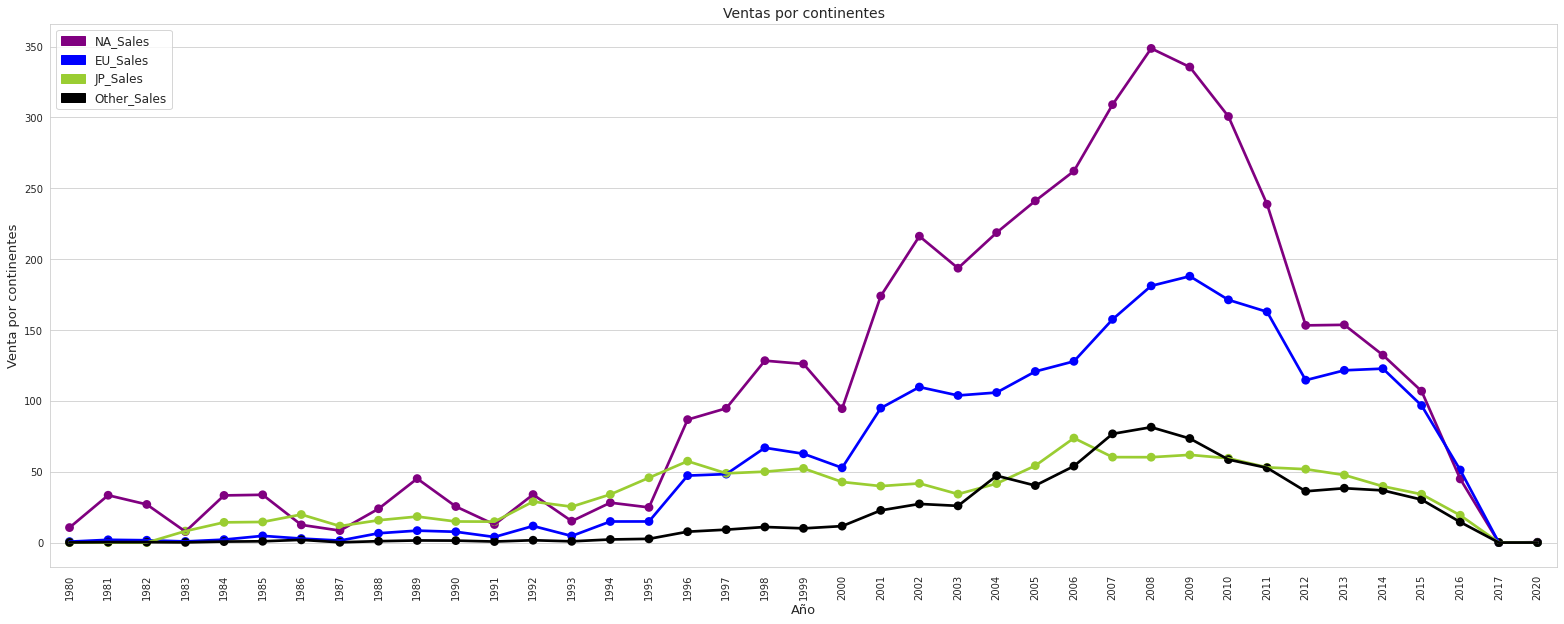

In [88]:
sns.set_style("whitegrid")
fig=plt.figure(figsize=(27,10))
plt.xticks(rotation=90)
colo='purple'
plt.title('Ventas por continentes',fontdict={'fontsize':14})
for i in range(0,len(df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().sort_values(ascending=False).index)):
    sns.pointplot(x='Year_of_Release',y=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().sort_values(ascending=False).index[i],data=df.groupby(df['Year_of_Release'].sort_values()).sum().drop(['Year_of_Release'],axis=1).reset_index(),color=colo)
    i=i+1
    if i == 1:
      colo='blue'
    elif i == 2:
      colo ='yellowgreen'
    elif i == 3:
      colo='black'

  

plt.legend(handles=[mpatches.Patch(color='purple', label=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().sort_values(ascending=False).index[0]),
                       mpatches.Patch(color='blue', label=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().sort_values(ascending=False).index[1]),
                       mpatches.Patch(color='yellowgreen', label=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().sort_values(ascending=False).index[2]),
                       mpatches.Patch(color='black', label=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().sort_values(ascending=False).index[3])], loc='upper left', fontsize = 12)    

plt.ylabel('Venta por continentes',fontdict={'fontsize':13})
plt.xlabel('Año',fontdict={'fontsize':13});

#En desarrollo

In [90]:
_# Me esta dando los datos malos
sc2 = StandardScaler()
Year_Sales_Regional = df.groupby(df['Year']).apply(lambda x: pd.Series({
    'Count'       : x['Name'].count(),
    'Global_Sales'       : x['Global_Sales'].sum(),
    'America_Sales'       : x['NA_Sales'].sum(),
    'Europe_Sales'       : x['EU_Sales'].sum(),
    'Japon_Sales'       : x['JP_Sales'].sum(),
    'Otras_Sales'       : x['Other_Sales'].sum()
    })).reset_index()

Year_Sales_Regional_2 = pd.concat([Year_Sales_Regional['Year'],pd.DataFrame(
    sc.fit_transform(Year_Sales_Regional[['Count','Global_Sales','America_Sales','Europe_Sales','Japon_Sales','Otras_Sales']]),
    columns=['Count', 'Global_Sales','America_Sales','Europe_Sales','Japon_Sales','Otras_Sales'])],axis=1)

fig2 = gro.Figure(data=[
    gro.Scatter(
                x=Year_Sales_Regional_2['Year'], 
                y=Year_Sales_Regional_2['America_Sales'],
                mode='lines+markers',
                name='Ventas Norte de America',
                marker = dict(size=8),
                line=dict(color = 'blue',width=2.5),
                text = Year_Sales_Regional['America_Sales'],
                hovertemplate = '<i>Año: </i>: %{x}'
                                '<br><i>Ventas Norte de America</i>: %{text}<br>'),
    gro.Scatter(
                x=Year_Sales_Regional_2['Year'], 
                y=Year_Sales_Regional_2['Europe_Sales'],
                mode='lines+markers',
                name='Ventas Europa',
                marker = dict(size=8),
                line=dict(color = 'red',width=2.5),
                text = Year_Sales_Regional['Europe_Sales'],
                hovertemplate = '<i>Año: </i>: %{x}'
                                '<br><i>Ventas Europa</i>: %{text}<br>'),
     gro.Scatter(
                x=Year_Sales_Regional_2['Year'], 
                y=Year_Sales_Regional_2['Japon_Sales'],
                mode='lines+markers',
                name='Ventas Japon',
                marker = dict(size=8),
                line=dict(color = 'green',width=2.5),
                text = Year_Sales_Regional['Japon_Sales'],
                hovertemplate = '<i>Año: </i>: %{x}'
                                '<br><i>Ventas Japon</i>: %{text}<br>'),
    
     gro.Scatter(
                x=Year_Sales_Regional_2['Year'], 
                y=Year_Sales_Regional_2['Otras_Sales'],
                mode='lines+markers',
                name='Ventas Otras',
                marker = dict(size=8),
                line=dict(color = 'black',width=2.5),
                text = Year_Sales_Regional['Otras_Sales'],
                hovertemplate = '<i>Año: </i>: %{x}'
                                '<br><i>Ventas Otras</i>: %{text}<br>'),
                        
        gro.Scatter(
                x=Year_Sales_Regional_2['Year'], 
                y=Year_Sales_Regional_2['Global_Sales'],
                mode='lines+markers',
                name='Ventas Global',
                marker = dict(size=8),
                line=dict(color = 'black',width=2.5),
                text = Year_Sales_Regional['Global_Sales'],
                hovertemplate = '<i>Año: </i>: %{x}'
                                '<br><i>Ventas Otras</i>: %{text}<br>'),

],layout=dict(legend=dict(x=0.73, y=1.15, font=dict(size=10)),legend_orientation="v",title="Releación entre las ventas y Regionales",
            xaxis=dict(tickmode = 'linear',tickangle=-90,tickfont=dict(size=10),title="Ventas",tickwidth=5,ticklen=8,zeroline=True,gridcolor="white",
             showline=True),
            yaxis=dict(title="Ventas / Regionales",zeroline=True,showline=True,gridcolor="#DCDCDC",
                         showgrid=True,
        zerolinecolor='#DCDCDC',
        zerolinewidth=1)
            ,plot_bgcolor='white'))

fig2.show()

#Next

In [112]:
Plataformas = ['PS2', 'DS', 'PS3', 'Wii', 'X360']
Principales = df.query('Platform in @lead_platforms')
Principales.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Year
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,2006.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,2008.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,2009.0
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,2006.0
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,2006.0


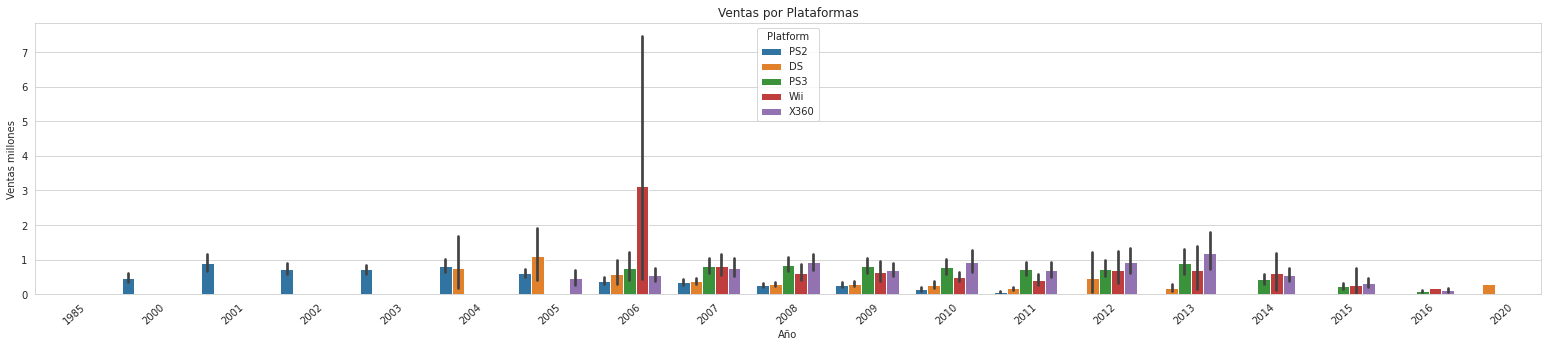

In [114]:
plt.figure(figsize=(27, 5))
sns.barplot(y='Global_Sales', 
            x='Year_of_Release', 
            hue='Platform', 
            data = Principales,
            hue_order = Plataformas
           )

plt.title('Ventas por Plataformas')
plt.xticks(rotation=42)
plt.xlabel('Año')
plt.ylabel('Ventas millones')
plt.show()